# Pierce - Diversity Metrics
Author: Leo Joseph (l1joseph@ucsd.edu)

Note: All data here is unfiltered and has no coverage filter applied

In [15]:
import pandas as pd
import os
import qupid
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu

# qiime2 imports
import qiime2 as q2
from qiime2 import Artifact, Metadata, Visualization
from qiime2.plugins.feature_table.methods import filter_features, filter_samples
import qiime2.plugins.diversity.actions as diversity_actions


# birdman imports
import biom
import numpy as np


In [3]:
# need to calculate all these metrics: Shannon, observed, chao1, PDwhole

## Computing all alpha & beta diversity metrics

In [2]:
# table = Artifact.import_data("FeatureTable[Frequency]", "qiita/191733_none.biom")
table = Artifact.import_data("FeatureTable[Frequency]", "qiita/195330_none.biom")
phylogeny = Artifact.import_data("Phylogeny[Rooted]", "ref/tree.nwk")
sampling_depth = 500000
metadata = Metadata.load("qiita/15350_20240110-175840.txt")

### Compute metrics

In [3]:
action_results = diversity_actions.core_metrics_phylogenetic(
    phylogeny=phylogeny,
    table=table,
    sampling_depth=sampling_depth,
    metadata=metadata,
)

rarefied_table = action_results.rarefied_table
faith_pd_vector = action_results.faith_pd_vector
observed_features_vector = action_results.observed_features_vector
shannon_vector = action_results.shannon_vector
evenness_vector = action_results.evenness_vector
unweighted_unifrac_distance_matrix = action_results.unweighted_unifrac_distance_matrix
weighted_unifrac_distance_matrix = action_results.weighted_unifrac_distance_matrix
jaccard_distance_matrix = action_results.jaccard_distance_matrix
bray_curtis_distance_matrix = action_results.bray_curtis_distance_matrix
unweighted_unifrac_pcoa_results = action_results.unweighted_unifrac_pcoa_results
weighted_unifrac_pcoa_results = action_results.weighted_unifrac_pcoa_results
jaccard_pcoa_results = action_results.jaccard_pcoa_results
bray_curtis_pcoa_results = action_results.bray_curtis_pcoa_results
unweighted_unifrac_emperor_viz = action_results.unweighted_unifrac_emperor
weighted_unifrac_emperor_viz = action_results.weighted_unifrac_emperor
jaccard_emperor_viz = action_results.jaccard_emperor
bray_curtis_emperor_viz = action_results.bray_curtis_emperor

/opt/homebrew/Caskroom/miniconda/base/envs/qiime2-shotgun-2024.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.13972863351619721 and the largest is 3.672945659963068.
  warn(


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /var/folders/tx/vgccmrkj1fz1zv99j496_3k80000gn/T/qiime2/leojo/data/8d9b926d-67ec-4e10-8ddf-01e30cfb289b/data/feature-table.biom -t /var/folders/tx/vgccmrkj1fz1zv99j496_3k80000gn/T/qiime2/leojo/data/8997ebc9-ce23-4183-81de-8f51f67a38cd/data/tree.nwk -o /var/folders/tx/vgccmrkj1fz1zv99j496_3k80000gn/T/q2-AlphaDiversityFormat-v328m2v7

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

ssu -i /var/folders/tx/vgccmrkj1fz1zv99j496_3k80000gn/T/qiime2/leojo/data/8d9b926d-67ec-4e10-8ddf-01e30cfb289b/data/feature-table.biom -t /var/folders/tx/vgccmrkj1fz1zv99j496_3k80000gn/T/q

/opt/homebrew/Caskroom/miniconda/base/envs/qiime2-shotgun-2024.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.2516593170153812 and the largest is 9.627446183853424.
  warn(


In [4]:
faith_pd_group_significance_viz, = diversity_actions.alpha_group_significance(
    alpha_diversity=faith_pd_vector,
    metadata=metadata,
)
evenness_group_significance_viz, = diversity_actions.alpha_group_significance(
    alpha_diversity=evenness_vector,
    metadata=metadata,
)

### Save Q2 artifacts

In [7]:
if not os.path.exists(f'out/rarefaction_{sampling_depth}'):
    os.makedirs(f'out/rarefaction_{sampling_depth}')

rarefied_table.save(f'out/rarefaction_{sampling_depth}/rarefied_table.qza')
faith_pd_vector.save(f'out/rarefaction_{sampling_depth}/faith_pd_vector.qza')
observed_features_vector.save(f'out/rarefaction_{sampling_depth}/observed_features_vector.qza')
shannon_vector.save(f'out/rarefaction_{sampling_depth}/shannon_vector.qza')
evenness_vector.save(f'out/rarefaction_{sampling_depth}/evenness_vector.qza')
unweighted_unifrac_distance_matrix.save(f'out/rarefaction_{sampling_depth}/unweighted_unifrac_distance_matrix.qza')
weighted_unifrac_distance_matrix.save(f'out/rarefaction_{sampling_depth}/weighted_unifrac_distance_matrix.qza')
jaccard_distance_matrix.save(f'out/rarefaction_{sampling_depth}/jaccard_distance_matrix.qza')
bray_curtis_distance_matrix.save(f'out/rarefaction_{sampling_depth}/bray_curtis_distance_matrix.qza')
unweighted_unifrac_pcoa_results.save(f'out/rarefaction_{sampling_depth}/unweighted_unifrac_pcoa_results.qza')
weighted_unifrac_pcoa_results.save(f'out/rarefaction_{sampling_depth}/weighted_unifrac_pcoa_results.qza')
jaccard_pcoa_results.save(f'out/rarefaction_{sampling_depth}/jaccard_pcoa_results.qza')
bray_curtis_pcoa_results.save(f'out/rarefaction_{sampling_depth}/bray_curtis_pcoa_results.qza')
unweighted_unifrac_emperor_viz.save(f'out/rarefaction_{sampling_depth}/unweighted_unifrac_emperor.qzv')
weighted_unifrac_emperor_viz.save(f'out/rarefaction_{sampling_depth}/weighted_unifrac_emperor.qzv')
jaccard_emperor_viz.save(f'out/rarefaction_{sampling_depth}/jaccard_emperor.qzv')
bray_curtis_emperor_viz.save(f'out/rarefaction_{sampling_depth}/bray_curtis_emperor.qzv')

'out/rarefaction_500000/bray_curtis_emperor.qzv'

In [8]:
faith_pd_group_significance_viz.save(f'out/rarefaction_{sampling_depth}/faith_pd_group_significance.qzv')
evenness_group_significance_viz.save(f'out/rarefaction_{sampling_depth}/evenness_group_significance.qzv')

'out/rarefaction_500000/evenness_group_significance.qzv'

## Load Metadata 
### (from 00_metadata)

In [6]:
metadata = Metadata.load('data/metadata/15350_20240110-175840_noblanks.txt')
metadata = metadata.to_dataframe()
fpd = Artifact.load('out/rarefaction_500000/faith_pd_vector.qza') 


In [7]:
metadata['ados_cosototrrtot'] = metadata['ados_cosototrrtot'].astype(int)
metadata['ados_cosotot'] = metadata['ados_cosotot'].astype(int)
metadata['ados_rrtot'] = metadata['ados_rrtot'].astype(int)
metadata['dna_extracted'] = metadata['dna_extracted'].astype(int)

In [8]:
print(metadata.shape)
metadata.head()


(83, 91)


,ados_cosotot,ados_cosototrrtot,ados_rrtot,ageatfecalsample,anonymized_name,antibiotics_last_2weeks,attend_daycare,breastfed_morethan1month,collection_date,collection_timestamp,...,sex,taxon_id,title,tube_id,vine_adapbehav_domstd,vine_comtotal_domstd,vine_dlytotal_domstd,vine_mtrtotal_domstd,vine_soctotal_domstd,zipcode
sample_name,,,,,,,,,,,,,,,,,,,,,
15350.A5U7C.2,8,14,6,35,X00235506,0,0.0,1,2023-02-08,2023-02-08,...,male,408170,Pierce ASD project,363146269,82,74,78,100,103,92026.0
15350.A6N5R.1,12,18,6,16,X00235660,0,0.0,1,2022-06-28,2022-06-28,...,male,408170,Pierce ASD project,363146304,95,96,95,102,99,92154.0
15350.A6T5B.1,1,2,1,14,X00235600,0,1.0,1,2022-04-18,2022-04-18,...,male,408170,Pierce ASD project,363146249,98,94,100,114,101,92102.0
15350.A7B7Z.1,20,27,7,24,X00235539,1,0.0,1,2022-06-21,2022-06-21,...,male,408170,Pierce ASD project,363146321,64,54,69,69,65,91950.0
15350.A7L6P.1,20,28,8,27,X00235658,0,0.0,1,2022-06-21,2022-06-21,...,male,408170,Pierce ASD project,363146256,74,60,92,89,75,91910.0


Join with faithpd

In [9]:
asd_fpd = metadata.join(fpd.view(pd.Series))

## Using Qupid for Case-Control-Matching

Pre-CCM

/opt/homebrew/Caskroom/miniconda/base/envs/qiime2-shotgun-2024.2/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


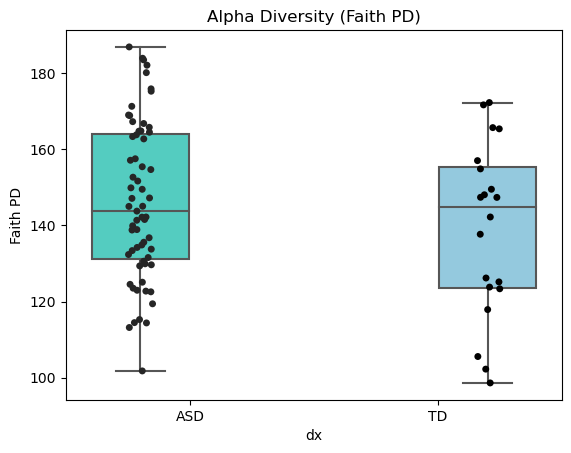

In [10]:
sns.boxplot(x='dx', y='faith_pd', data=asd_fpd, hue='dx', palette=['turquoise', 'skyblue'])
sns.stripplot(x='dx', y='faith_pd', data=asd_fpd, hue='dx', dodge=True, jitter=True, color='black') 

plt.title('Alpha Diversity (Faith PD)')
plt.ylabel('Faith PD')
plt.legend(loc='upper center', fontsize = "7").set_visible(False)
plt.show()

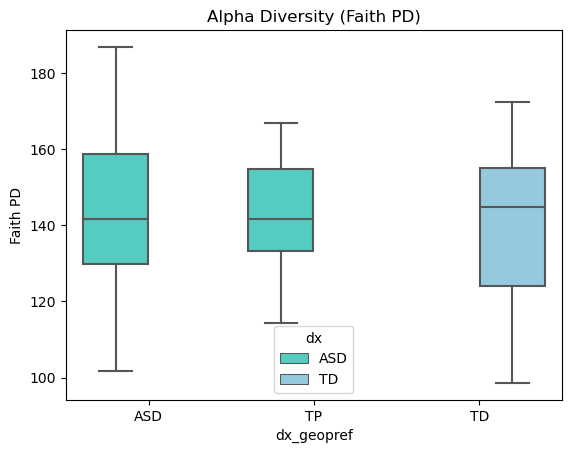

In [11]:
sns.boxplot(x='dx_geopref', y='faith_pd', data=asd_fpd, hue='dx', palette=['turquoise', 'skyblue'])

plt.title('Alpha Diversity (Faith PD)')
plt.ylabel('Faith PD')
plt.show()


CCM

In [16]:
asd_str = "TP"
no_asd_str = "TD"

background = asd_fpd.query("dx_mtrtraffic == @no_asd_str")
focus = asd_fpd.query("dx_mtrtraffic == @asd_str")
# focus.drop(index='15350.A7L6P.1', inplace=True)
# focus.drop(index='15350.C3Z7C.1', inplace=True)


matches = qupid.shuffle(
    focus=focus,
    background=background,
    categories=["host_age"],
    tolerance_map={"host_age": 3},
    iterations=100,
    on_failure="ignore"
)

/opt/homebrew/Caskroom/miniconda/base/envs/qiime2-shotgun-2024.2/lib/python3.8/site-packages/qupid/qupid.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for f_idx, f_val in focus.iteritems():


/var/folders/tx/vgccmrkj1fz1zv99j496_3k80000gn/T/ipykernel_30550/3782623130.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asd_tp_df['Group'] = 'ASD-TP'
/var/folders/tx/vgccmrkj1fz1zv99j496_3k80000gn/T/ipykernel_30550/3782623130.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asd_tp_df['Group'] = 'ASD-TP'


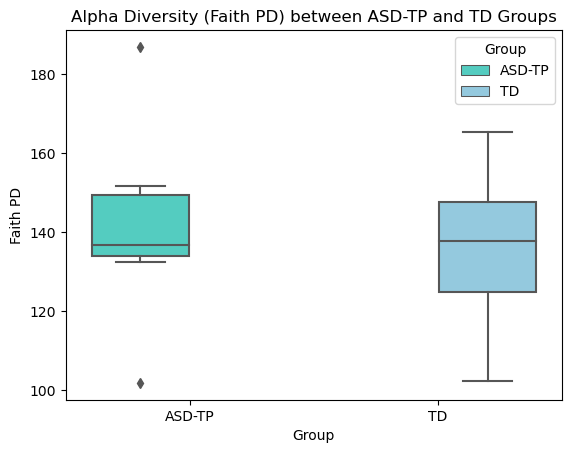

Kruskal-Wallis Test Statistic: 0.03673469387754835, p-value: 0.8480062142193152


In [17]:
# Filter for ASD-TP group
asd_tp_df = asd_fpd[asd_fpd['dx_mtrtraffic'] == 'TP']
td_df = asd_fpd[asd_fpd['dx_mtrtraffic'] == 'TD'].sample(n=len(asd_tp_df), random_state=42)

asd_tp_df['Group'] = 'ASD-TP'
td_df['Group'] = 'TD'

# Concatenate the two DataFrames and add a new column to label the groups
asd_tp_df['Group'] = 'ASD-TP'
td_df['Group'] = 'TD'
combined_df = pd.concat([asd_tp_df, td_df])

# Plotting
sns.boxplot(x='Group', y='faith_pd', data=combined_df, hue='Group', palette=['turquoise', 'skyblue'])
plt.title('Alpha Diversity (Faith PD) between ASD-TP and TD Groups')
plt.ylabel('Faith PD')
plt.show()

# Extracting Faith PD values for each group
faith_pd_asd_tp = combined_df[combined_df['Group'] == 'ASD-TP']['faith_pd']
faith_pd_td = combined_df[combined_df['Group'] == 'TD']['faith_pd']

# Kruskal-Wallis Test
stat1, p1 = kruskal(faith_pd_asd_tp, faith_pd_td)
print(f'Kruskal-Wallis Test Statistic: {stat1}, p-value: {p1}')

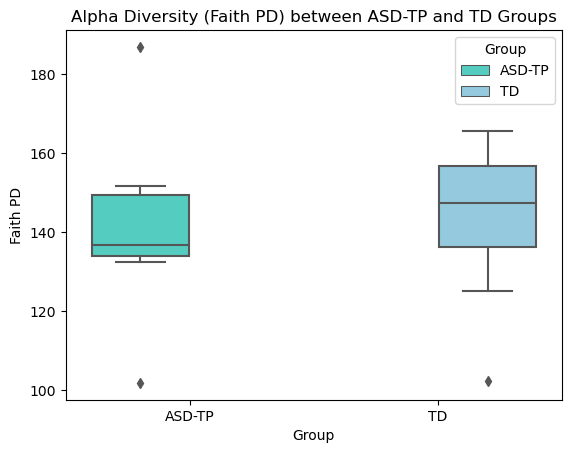

Kruskal-Wallis Test Statistic: 0.3306122448979636, p-value: 0.5652987983097866


In [18]:
# Filter asd_md for ASD-TP and TD groups
asd_tp_df = asd_fpd.loc[matches[0].index]
td_df = asd_fpd.loc[matches[0].values]

# Concatenate the two DataFrames and add a new column to label the groups
asd_tp_df['Group'] = 'ASD-TP'
td_df['Group'] = 'TD'
combined_df = pd.concat([asd_tp_df, td_df])

# Plotting
sns.boxplot(x='Group', y='faith_pd', data=combined_df, hue='Group', palette=['turquoise', 'skyblue'])
plt.title('Alpha Diversity (Faith PD) between ASD-TP and TD Groups')
plt.ylabel('Faith PD')
plt.show()

# Extracting Faith PD values for each group
faith_pd_asd_tp = combined_df[combined_df['Group'] == 'ASD-TP']['faith_pd']
faith_pd_td = combined_df[combined_df['Group'] == 'TD']['faith_pd']

# Kruskal-Wallis Test
stat2, p2 = kruskal(faith_pd_asd_tp, faith_pd_td)
print(f'Kruskal-Wallis Test Statistic: {stat2}, p-value: {p2}')

In [19]:
print(f'Before Case-Control Matching using Qupid: ')
print(f'Kruskal-Wallis Test Statistic: {stat1}, p-value: {p1}\n')
print(f'After Case-Control Matching using Qupid: ')
print(f'Kruskal-Wallis Test Statistic: {stat2}, p-value: {p2}')

Before Case-Control Matching using Qupid: 
Kruskal-Wallis Test Statistic: 0.03673469387754835, p-value: 0.8480062142193152

After Case-Control Matching using Qupid: 
Kruskal-Wallis Test Statistic: 0.3306122448979636, p-value: 0.5652987983097866


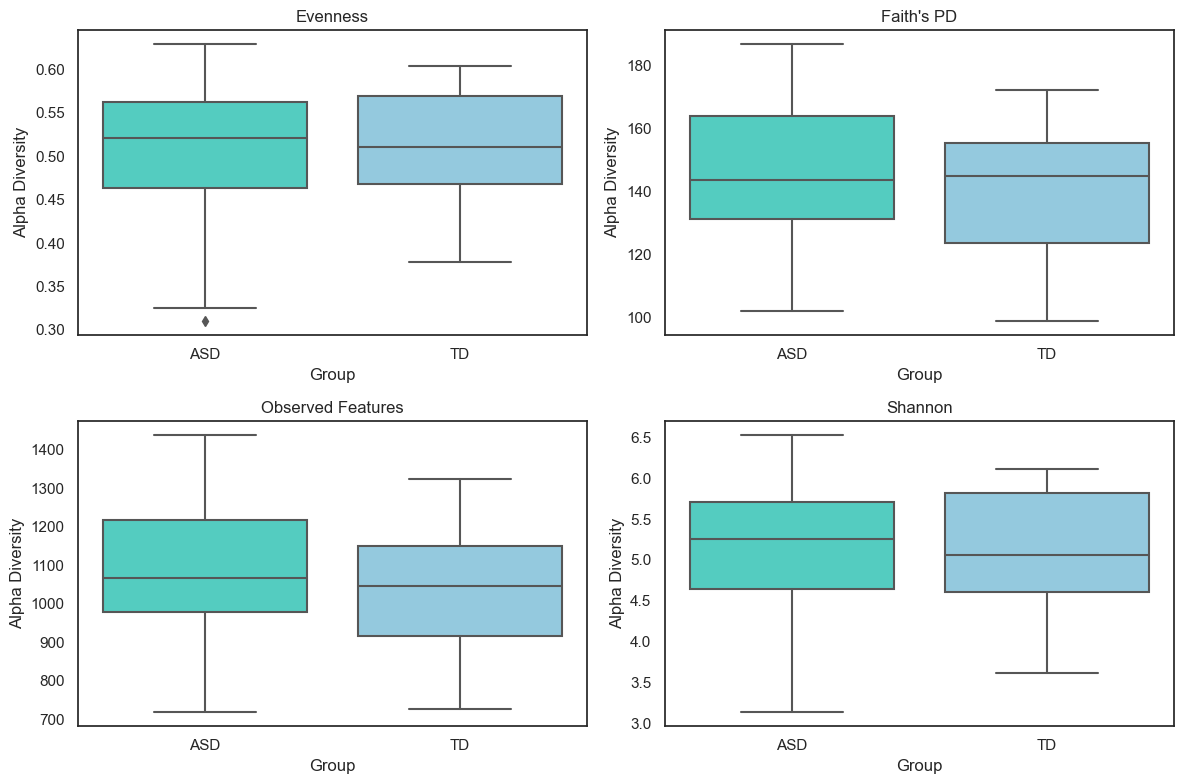

Evenness: Mann-Whitney U statistic = 655.0, p-value = 0.7941892150565808
Faith's PD: Mann-Whitney U statistic = 715.0, p-value = 0.3682526895650068
Observed Features: Mann-Whitney U statistic = 726.5, p-value = 0.30666983607843723
Shannon: Mann-Whitney U statistic = 673.0, p-value = 0.6508817642701086


In [101]:
# Load the alpha diversity vectors
evenness = Artifact.load('out/rarefaction_500000/evenness_vector.qza')
faith_pd = Artifact.load('out/rarefaction_500000/faith_pd_vector.qza')
observed_features = Artifact.load('out/rarefaction_500000/observed_features_vector.qza')
shannon = Artifact.load('out/rarefaction_500000/shannon_vector.qza')

# Convert the alpha diversity vectors to pandas DataFrames
evenness_df = evenness.view(pd.Series).to_frame(name='Evenness')
faith_pd_df = faith_pd.view(pd.Series).to_frame(name='Faith_PD')
observed_features_df = observed_features.view(pd.Series).to_frame(name='Observed_Features')
shannon_df = shannon.view(pd.Series).to_frame(name='Shannon')

# Merge the DataFrames
alpha_diversity_df = pd.concat([evenness_df, faith_pd_df, observed_features_df, shannon_df], axis=1)

# Add metadata if available (assuming you have a metadata file)
metadata = Metadata.load('data/metadata/15350_20240110-175840_noblanks.txt')
metadata = metadata.to_dataframe()
alpha_diversity_df = alpha_diversity_df.merge(metadata, left_index=True, right_index=True)


# Set up the plot
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.ravel()

# Visualize the alpha diversity metrics using box plots
sns.boxplot(data=alpha_diversity_df, x='dx', y='Evenness', ax=axs[0], palette=['turquoise', 'skyblue'])
sns.boxplot(data=alpha_diversity_df, x='dx', y='Faith_PD', ax=axs[1], palette=['turquoise', 'skyblue'])
sns.boxplot(data=alpha_diversity_df, x='dx', y='Observed_Features', ax=axs[2], palette=['turquoise', 'skyblue'])
sns.boxplot(data=alpha_diversity_df, x='dx', y='Shannon', ax=axs[3], palette=['turquoise', 'skyblue'])

# Set plot titles and labels
axs[0].set_title('Evenness')
axs[1].set_title('Faith\'s PD')
axs[2].set_title('Observed Features')
axs[3].set_title('Shannon')

for ax in axs:
    ax.set_xlabel('Group')
    ax.set_ylabel('Alpha Diversity')

plt.tight_layout()
plt.show()

# Perform Mann-Whitney U test to compare alpha diversity between groups
group1 = alpha_diversity_df[alpha_diversity_df['dx'] == 'ASD']
group2 = alpha_diversity_df[alpha_diversity_df['dx'] == 'TD']

evenness_stat, evenness_p = mannwhitneyu(group1['Evenness'], group2['Evenness'])
faith_pd_stat, faith_pd_p = mannwhitneyu(group1['Faith_PD'], group2['Faith_PD'])
observed_features_stat, observed_features_p = mannwhitneyu(group1['Observed_Features'], group2['Observed_Features'])
shannon_stat, shannon_p = mannwhitneyu(group1['Shannon'], group2['Shannon'])

print(f"Evenness: Mann-Whitney U statistic = {evenness_stat}, p-value = {evenness_p}")
print(f"Faith's PD: Mann-Whitney U statistic = {faith_pd_stat}, p-value = {faith_pd_p}")
print(f"Observed Features: Mann-Whitney U statistic = {observed_features_stat}, p-value = {observed_features_p}")
print(f"Shannon: Mann-Whitney U statistic = {shannon_stat}, p-value = {shannon_p}")

In [23]:
# Perform Mann-Whitney U test to compare alpha diversity between groups
group1 = alpha_diversity_df[alpha_diversity_df['dx_geopref'] == 'ASD']
group2 = alpha_diversity_df[alpha_diversity_df['dx_geopref'] == 'TP']

evenness_stat, evenness_p = mannwhitneyu(group1['Evenness'], group2['Evenness'])
faith_pd_stat, faith_pd_p = mannwhitneyu(group1['Faith_PD'], group2['Faith_PD'])
observed_features_stat, observed_features_p = mannwhitneyu(group1['Observed_Features'], group2['Observed_Features'])
shannon_stat, shannon_p = mannwhitneyu(group1['Shannon'], group2['Shannon'])

print(f"Evenness: Mann-Whitney U statistic = {evenness_stat}, p-value = {evenness_p}")
print(f"Faith's PD: Mann-Whitney U statistic = {faith_pd_stat}, p-value = {faith_pd_p}")
print(f"Observed Features: Mann-Whitney U statistic = {observed_features_stat}, p-value = {observed_features_p}")
print(f"Shannon: Mann-Whitney U statistic = {shannon_stat}, p-value = {shannon_p}")

Evenness: Mann-Whitney U statistic = 160.0, p-value = 0.8829468685408175
Faith's PD: Mann-Whitney U statistic = 157.0, p-value = 0.946648148004191
Observed Features: Mann-Whitney U statistic = 147.0, p-value = 0.858781940970152
Shannon: Mann-Whitney U statistic = 164.0, p-value = 0.799190136739247


### Plots

<AxesSubplot: xlabel='dx_geopref', ylabel='Faith_PD'>

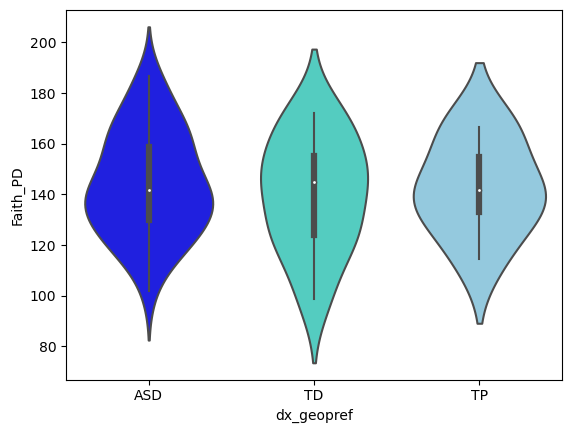

In [24]:
sns.violinplot(data=alpha_diversity_df, x='dx_geopref', y='Faith_PD', jitter ='true', dodge = 'true', palette=['blue', 'turquoise', 'skyblue'])

<AxesSubplot: xlabel='dx', ylabel='Observed_Features'>

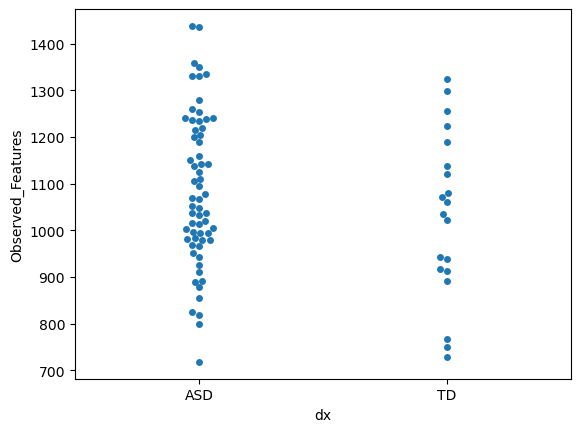

In [25]:
sns.swarmplot(data=alpha_diversity_df, x='dx', y='Observed_Features')

<AxesSubplot: xlabel='Faith_PD', ylabel='Density'>

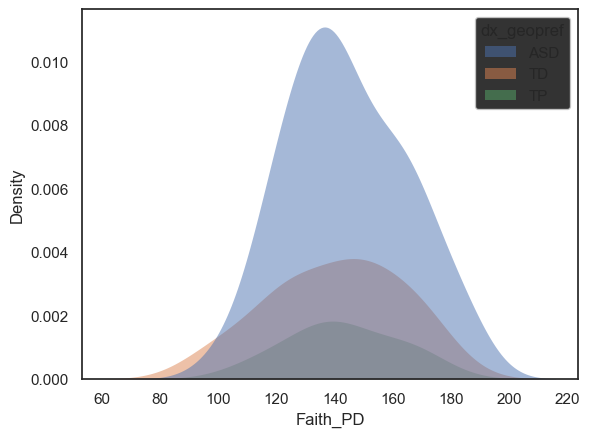

In [26]:
# overlapping density plot that shows the distribution of alpha diversity metrics across different groups
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
sns.kdeplot(data=alpha_diversity_df, x='Faith_PD', hue='dx_geopref', fill=True, alpha=0.5, linewidth=0)

In [27]:
# sns.heatmap(alpha_diversity_df.corr(), cmap='coolwarm', annot=True)

<Figure size 1000x600 with 0 Axes>

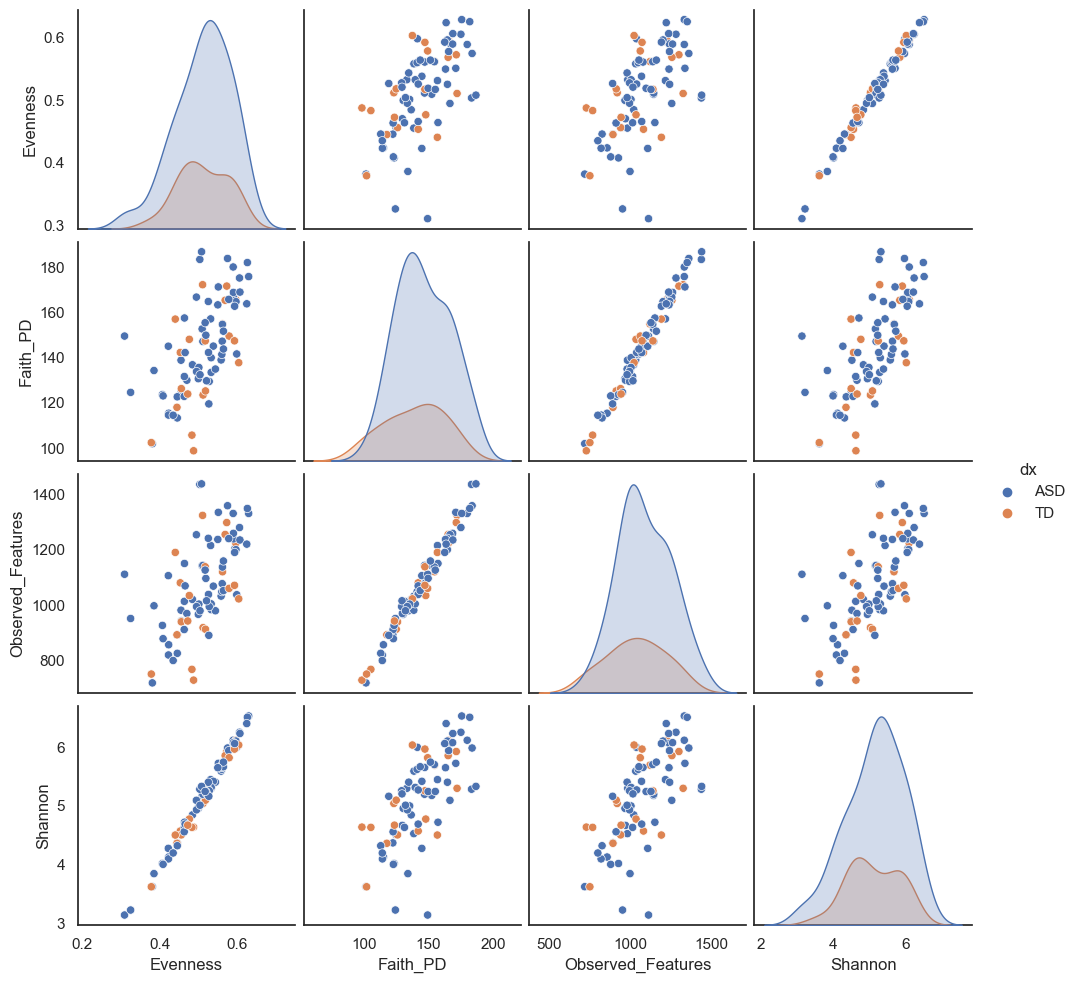

In [28]:
plt.figure(figsize=(10, 6))
sns.pairplot(alpha_diversity_df, vars=['Evenness', 'Faith_PD', 'Observed_Features', 'Shannon'], hue='dx')
plt.show()

### Exploring Alpha Diversity

/var/folders/tx/vgccmrkj1fz1zv99j496_3k80000gn/T/ipykernel_30550/3028631783.py:2: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(x='dx', y='Shannon', data=alpha_diversity_df, hue='dx', dodge=True, jitter=True, palette=['black'])


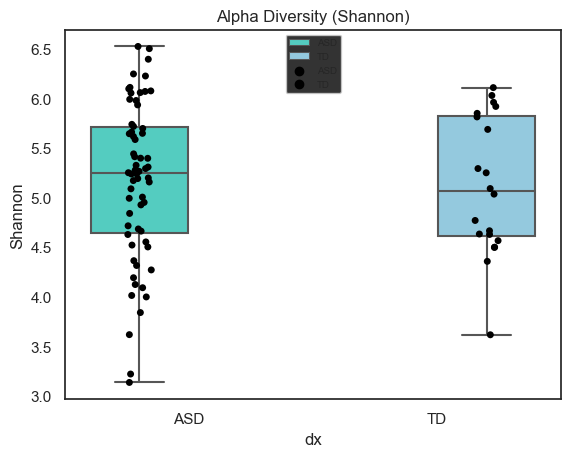

In [29]:
sns.boxplot(x='dx', y='Shannon', data=alpha_diversity_df, hue='dx', palette=['turquoise', 'skyblue'])
sns.stripplot(x='dx', y='Shannon', data=alpha_diversity_df, hue='dx', dodge=True, jitter=True, palette=['black']) 

plt.title('Alpha Diversity (Shannon)')
plt.ylabel('Shannon')
plt.legend(loc='upper center', fontsize = "7")
plt.show()

/var/folders/tx/vgccmrkj1fz1zv99j496_3k80000gn/T/ipykernel_30550/1022236493.py:2: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(x='dx', y='Evenness', data=alpha_diversity_df, hue='dx', dodge=True, jitter=True, palette=['black'])


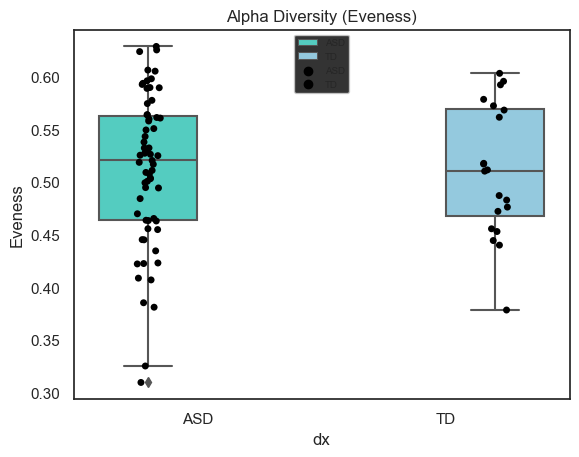

In [30]:
sns.boxplot(x='dx', y='Evenness', data=alpha_diversity_df, hue='dx', palette=['turquoise', 'skyblue'])
sns.stripplot(x='dx', y='Evenness', data=alpha_diversity_df, hue='dx', dodge=True, jitter=True, palette=['black']) 

plt.title('Alpha Diversity (Eveness)')
plt.ylabel('Eveness')
plt.legend(loc='upper center', fontsize = "7")
plt.show()

# Coverage Filtering using Zebra

In [42]:
# load table
# table = q2.Artifact.import_data('FeatureTable[Frequency]', "data/wolr2/gg2/196551_feature-table.biom")
table = q2.Artifact.import_data("FeatureTable[Frequency]", "qiita/195330_none.biom")

metadata = q2.Metadata.load('qiita/15350_20240110-175840.txt')

# load coverages
coverages = pd.read_csv("qiita/195330_coverages/coverage_percentage.txt", sep='\t', index_col=0, header=None)



In [43]:
def filter_table_by_coverage(feature_table, coverages_df, coverage_threshold):
    """
    Filter the feature table by a given coverage threshold.

    Parameters:
    - feature_table: QIIME 2 Artifact of type 'FeatureTable[Frequency]'
    - coverages_df: pandas DataFrame with coverages, index are OGUs, column 1 is the coverage percentage
    - coverage_threshold: float, minimum coverage percentage to retain an OGU

    Returns:
    - int, the number of OGUs remaining after filtering
    """
    # filter the coverages DataFrame to retain only OGUs above the given threshold
    filtered_ogus = coverages_df[coverages_df[1] >= coverage_threshold].index.tolist()

    # convert the list of OGUs to QIIME 2 Metadata for filtering
    filtered_metadata = Metadata(pd.DataFrame(index=pd.Index(filtered_ogus, name='id')))
    
    # filter the feature table
    filtered_table, = filter_features(table, metadata=filtered_metadata)
    
    # get the number of features (OGUs) remaining after filtering
    filtered_table_df = filtered_table.view(pd.DataFrame)
    remaining_ogus = filtered_table_df.shape[1]  # features are columns
    
    return remaining_ogus

In [44]:
coverage_thresholds = np.arange(1, 100)  # 1% to 100%

# record the number of OGUs remaining for each coverage threshold
ogus_remaining = []
for threshold in coverage_thresholds:
    remaining = filter_table_by_coverage(table, coverages, threshold)
    ogus_remaining.append(remaining)

In [45]:
print(threshold)
print(ogus_remaining)
print(coverage_thresholds)

99
[1533, 1145, 990, 878, 795, 753, 715, 677, 648, 632, 608, 570, 554, 542, 523, 514, 508, 505, 495, 486, 479, 472, 466, 458, 451, 447, 440, 436, 432, 428, 422, 418, 412, 411, 408, 403, 397, 395, 392, 389, 386, 383, 379, 379, 375, 371, 366, 362, 362, 361, 361, 355, 355, 353, 349, 345, 343, 340, 339, 331, 328, 328, 322, 320, 317, 313, 312, 308, 304, 303, 302, 297, 296, 292, 290, 288, 288, 285, 281, 277, 276, 270, 261, 259, 255, 246, 241, 239, 229, 220, 208, 194, 184, 161, 142, 112, 84, 60, 29]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99]


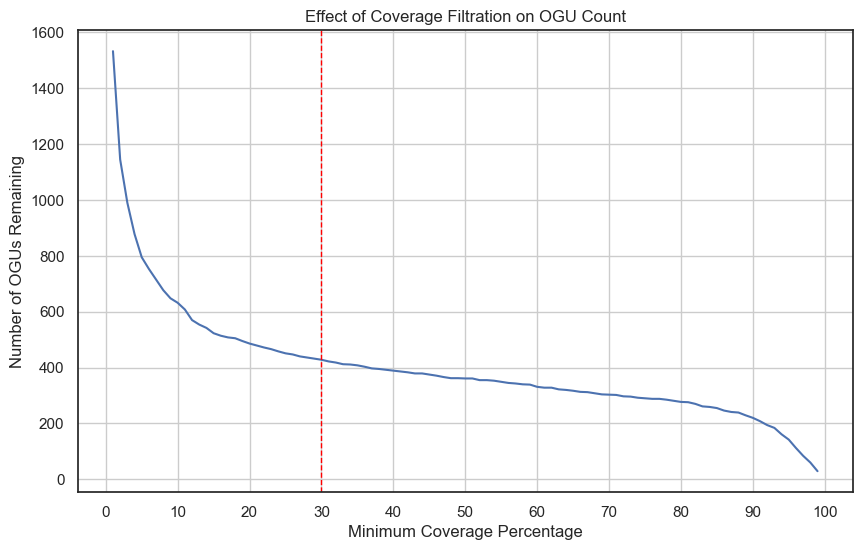

In [46]:
# plot coverage as line graph
plt.figure(figsize=(10, 6))
sns.lineplot(x=coverage_thresholds, y=ogus_remaining)
plt.title('Effect of Coverage Filtration on OGU Count')
plt.xlabel('Minimum Coverage Percentage')
plt.ylabel('Number of OGUs Remaining')
plt.xticks(np.arange(0, 101, 10))
plt.axvline(30, color='red', linestyle='--', linewidth=1)
plt.grid(True)
plt.show()

In [86]:
if not os.path.exists(f'data/wolr2/zebra30'):
    os.makedirs(f'data/wolr2/zebra30')

threshold = 30 # percentage
filtered_ogus = coverages[coverages[1] >= threshold].index.tolist()
filtered_metadata = Metadata(pd.DataFrame(index=pd.Index(filtered_ogus, name='id')))
filtered_table, = filter_features(table, metadata=filtered_metadata)

# blank filter
# TODO: ScRUB?
metadata_df = metadata.to_dataframe()
filtered_metadata_df = metadata_df[~metadata_df.index.str.contains('BLANK')]
filtered_metadata = q2.Metadata(filtered_metadata_df)
filtered_table, = filter_samples(table=filtered_table, metadata=filtered_metadata)
filtered_table.save("data/wolr2/zebra30/196551_zebra_2024_9.qza")

'data/wolr2/zebra30/196551_zebra_2024_9.qza'

# Filter to GG2

In [48]:
!pip install q2-greengenes2

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 414.1/414.1 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 31.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.8/287.8 kB 23.6 MB/s eta 0:00:00
  Created wheel for q2-greengenes2: filename=q2_greengenes2-2024.1-py3-none-any.whl size=20593 sha256=bfb5497e29e3a6ffc4ccfd3da164d7da207079c9cc4c2bcd23c8174ab3b31af9
  Stored in directory: /Users/leojo/Library/Caches/pip/wheels/a3/99/9e/bc7588ae8946cd3dc33405fe53d8699ae03c261c9a4f994054
  Created wheel for redbiom: filename=redbiom-0.3.9-py3-none-any.whl size=406128 sha256=d62a9699afc9fa2e07880efcf104ed0c8ccaf52b4e25a436e78fb4a36f53c088
  Stored in directory: /Users/leojo/Library/Caches/pip/wheels/f0/5a/f3/78598a57db63fc6e991ea63b230c2f2ebf1fbb258555fdf50d
Successfully built q2-greengen

In [53]:

!qiime greengenes2 filter-features \
     --i-feature-table data/wolr2/zebra30/196551_zebra_2024_9.qza \
     --i-reference ref/gg2/2024.09.taxonomy.asv.nwk.qza \
     --o-filtered-feature-table data/wolr2/gg2/zebra30/196551_zebra_2024_9.qza

Saved FeatureTable[Frequency] to: data/wolr2/gg2/zebra30/196551_zebra_2024_9.qza


In [55]:
!qiime greengenes2 taxonomy-from-table \
     --i-reference-taxonomy ref/gg2/2024.09.taxonomy.asv.nwk.qza \
     --i-table data/wolr2/gg2/zebra30/196551_zebra_2024_9.qza \
     --o-classification data/wolr2/gg2/zebra30/196551_zebra_2024_9.taxonomy.qza

Saved FeatureData[Taxonomy] to: data/wolr2/gg2/zebra30/196551_zebra_2024_9.taxonomy.qza


# Rerun Core Diversity Metrics (GG2)

In [57]:
table = Artifact.load("data/wolr2/gg2/zebra30/196551_zebra_2024_9.qza")
phylogeny = Artifact.import_data("Phylogeny[Rooted]", "ref/gg2/2024.09.phylogeny.asv.nwk")
sampling_depth = 500000
metadata = Metadata.load("qiita/15350_20240110-175840.txt")

### Compute metrics

In [58]:
action_results = diversity_actions.core_metrics_phylogenetic(
    phylogeny=phylogeny,
    table=table,
    sampling_depth=sampling_depth,
    metadata=metadata,
)

rarefied_table = action_results.rarefied_table
faith_pd_vector = action_results.faith_pd_vector
observed_features_vector = action_results.observed_features_vector
shannon_vector = action_results.shannon_vector
evenness_vector = action_results.evenness_vector
unweighted_unifrac_distance_matrix = action_results.unweighted_unifrac_distance_matrix
weighted_unifrac_distance_matrix = action_results.weighted_unifrac_distance_matrix
jaccard_distance_matrix = action_results.jaccard_distance_matrix
bray_curtis_distance_matrix = action_results.bray_curtis_distance_matrix
unweighted_unifrac_pcoa_results = action_results.unweighted_unifrac_pcoa_results
weighted_unifrac_pcoa_results = action_results.weighted_unifrac_pcoa_results
jaccard_pcoa_results = action_results.jaccard_pcoa_results
bray_curtis_pcoa_results = action_results.bray_curtis_pcoa_results
unweighted_unifrac_emperor_viz = action_results.unweighted_unifrac_emperor
weighted_unifrac_emperor_viz = action_results.weighted_unifrac_emperor
jaccard_emperor_viz = action_results.jaccard_emperor
bray_curtis_emperor_viz = action_results.bray_curtis_emperor

/opt/homebrew/Caskroom/miniconda/base/envs/qiime2-shotgun-2024.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.01595527979824624 and the largest is 0.3394271969297482.
  warn(
/opt/homebrew/Caskroom/miniconda/base/envs/qiime2-shotgun-2024.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the result

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /var/folders/tx/vgccmrkj1fz1zv99j496_3k80000gn/T/qiime2/leojo/data/67aa2b53-3f00-4194-b489-128cac778f69/data/feature-table.biom -t /var/folders/tx/vgccmrkj1fz1zv99j496_3k80000gn/T/qiime2/leojo/data/222b9870-fb65-4e1f-9f16-5b9b43c1523c/data/tree.nwk -o /var/folders/tx/vgccmrkj1fz1zv99j496_3k80000gn/T/q2-AlphaDiversityFormat-d_ujo9xx

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

ssu -i /var/folders/tx/vgccmrkj1fz1zv99j496_3k80000gn/T/qiime2/leojo/data/67aa2b53-3f00-4194-b489-128cac778f69/data/feature-table.biom -t /var/folders/tx/vgccmrkj1fz1zv99j496_3k80000gn/T/q

/opt/homebrew/Caskroom/miniconda/base/envs/qiime2-shotgun-2024.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.013864260159230852 and the largest is 0.17282026695835864.
  warn(
/opt/homebrew/Caskroom/miniconda/base/envs/qiime2-shotgun-2024.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the resu

In [59]:
faith_pd_group_significance_viz, = diversity_actions.alpha_group_significance(
    alpha_diversity=faith_pd_vector,
    metadata=metadata,
)
evenness_group_significance_viz, = diversity_actions.alpha_group_significance(
    alpha_diversity=evenness_vector,
    metadata=metadata,
)

### Save Q2 artifacts

In [61]:
if not os.path.exists(f'out/rarefaction_{sampling_depth}/gg2'):
    os.makedirs(f'out/rarefaction_{sampling_depth}/gg2')

rarefied_table.save(f'out/rarefaction_{sampling_depth}/gg2/rarefied_table.qza')
faith_pd_vector.save(f'out/rarefaction_{sampling_depth}/gg2/faith_pd_vector.qza')
observed_features_vector.save(f'out/rarefaction_{sampling_depth}/gg2/observed_features_vector.qza')
shannon_vector.save(f'out/rarefaction_{sampling_depth}/gg2/shannon_vector.qza')
evenness_vector.save(f'out/rarefaction_{sampling_depth}/gg2/evenness_vector.qza')
unweighted_unifrac_distance_matrix.save(f'out/rarefaction_{sampling_depth}/gg2/unweighted_unifrac_distance_matrix.qza')
weighted_unifrac_distance_matrix.save(f'out/rarefaction_{sampling_depth}/gg2/weighted_unifrac_distance_matrix.qza')
jaccard_distance_matrix.save(f'out/rarefaction_{sampling_depth}/gg2/jaccard_distance_matrix.qza')
bray_curtis_distance_matrix.save(f'out/rarefaction_{sampling_depth}/gg2/bray_curtis_distance_matrix.qza')
unweighted_unifrac_pcoa_results.save(f'out/rarefaction_{sampling_depth}/gg2/unweighted_unifrac_pcoa_results.qza')
weighted_unifrac_pcoa_results.save(f'out/rarefaction_{sampling_depth}/gg2/weighted_unifrac_pcoa_results.qza')
jaccard_pcoa_results.save(f'out/rarefaction_{sampling_depth}/gg2/jaccard_pcoa_results.qza')
bray_curtis_pcoa_results.save(f'out/rarefaction_{sampling_depth}/gg2/bray_curtis_pcoa_results.qza')
unweighted_unifrac_emperor_viz.save(f'out/rarefaction_{sampling_depth}/gg2/unweighted_unifrac_emperor.qzv')
weighted_unifrac_emperor_viz.save(f'out/rarefaction_{sampling_depth}/gg2/weighted_unifrac_emperor.qzv')
jaccard_emperor_viz.save(f'out/rarefaction_{sampling_depth}/gg2/jaccard_emperor.qzv')
bray_curtis_emperor_viz.save(f'out/rarefaction_{sampling_depth}/gg2/bray_curtis_emperor.qzv')

'out/rarefaction_500000/gg2/bray_curtis_emperor.qzv'

In [62]:
faith_pd_group_significance_viz.save(f'out/rarefaction_{sampling_depth}/gg2/faith_pd_group_significance.qzv')
evenness_group_significance_viz.save(f'out/rarefaction_{sampling_depth}/gg2/evenness_group_significance.qzv')

'out/rarefaction_500000/gg2/evenness_group_significance.qzv'

In [102]:
import pandas as pd
import qiime2
from qiime2 import Metadata
from qiime2.plugins import diversity
import skbio

# Set sampling depth
sampling_depth = 500000

# Load the distance matrices from QIIME2 artifacts
unweighted_artifact = qiime2.Artifact.load(
    f'out/rarefaction_{sampling_depth}/gg2/unweighted_unifrac_distance_matrix.qza'
)
weighted_artifact = qiime2.Artifact.load(
    f'out/rarefaction_{sampling_depth}/gg2/weighted_unifrac_distance_matrix.qza'
)

# Extract distance matrices as skbio objects
unweighted_dm = unweighted_artifact.view(skbio.DistanceMatrix)
weighted_dm = weighted_artifact.view(skbio.DistanceMatrix)

# Load metadata
metadata = Metadata.load('data/metadata/15350_20240110-175840_noblanks.txt')
metadata_df = metadata.to_dataframe()

# Keep only relevant columns
metadata_df_subset = metadata_df[['host_age', 'household_income_code', 'ethnicity']].copy()

# Find samples that are in both the distance matrix and metadata
dm_samples = set(unweighted_dm.ids)
metadata_samples = set(metadata_df_subset.index)
common_samples = list(dm_samples.intersection(metadata_samples))

print(f"Samples in distance matrix: {len(dm_samples)}")
print(f"Samples in metadata: {len(metadata_samples)}")
print(f"Common samples: {len(common_samples)}")
print(f"Samples only in distance matrix (likely controls): {len(dm_samples - metadata_samples)}")
if dm_samples - metadata_samples:
    print(f"  Examples: {list(dm_samples - metadata_samples)[:5]}")

# Filter distance matrices to common samples
unweighted_dm_filtered = unweighted_dm.filter(common_samples)
weighted_dm_filtered = weighted_dm.filter(common_samples)

# Filter metadata to common samples
metadata_df_filtered = metadata_df_subset.loc[common_samples]

# Create filtered QIIME2 artifacts
unweighted_artifact_filtered = qiime2.Artifact.import_data(
    'DistanceMatrix',
    unweighted_dm_filtered
)
weighted_artifact_filtered = qiime2.Artifact.import_data(
    'DistanceMatrix',
    weighted_dm_filtered
)

# Convert to QIIME2 Metadata object
metadata_filtered = qiime2.Metadata(metadata_df_filtered)

# Run PERMANOVA (ADONIS) on unweighted UniFrac
print("\n" + "=" * 70)
print("ADONIS/PERMANOVA: Unweighted UniFrac Distance")
print("=" * 70)
print("Formula: distance ~ host_age + household_income_code + ethnicity\n")

unweighted_results = diversity.actions.adonis(
    distance_matrix=unweighted_artifact_filtered,
    metadata=metadata_filtered,
    formula='host_age + household_income_code + ethnicity',
    permutations=999,
    n_jobs=1
)

# Save and display results
unweighted_results.visualization.save('out/adonis_unweighted_unifrac.qzv')
print("Results saved to: out/adonis_unweighted_unifrac.qzv")


# Run PERMANOVA (ADONIS) on weighted UniFrac
print("=" * 70)
print("ADONIS/PERMANOVA: Weighted UniFrac Distance")
print("=" * 70)
print("Formula: distance ~ host_age + household_income_code + ethnicity\n")

weighted_results = diversity.actions.adonis(
    distance_matrix=weighted_artifact_filtered,
    metadata=metadata_filtered,
    formula='host_age + household_income_code + ethnicity',
    permutations=999,
    n_jobs=1
)

# Save and display results
weighted_results.visualization.save('out/adonis_weighted_unifrac.qzv')
print("Results saved to: out/adonis_weighted_unifrac.qzv")


# Print summary statistics
print("=" * 70)
print("Summary Statistics")
print("=" * 70)
print(f"Number of samples analyzed: {len(metadata_df_filtered)}")
print(f"\nAge: mean ± SD = {metadata_df_filtered['host_age'].mean():.1f} ± {metadata_df_filtered['host_age'].std():.1f}")
print(f"Age range: {metadata_df_filtered['host_age'].min()} - {metadata_df_filtered['host_age'].max()}")
print(f"\nIncome distribution:")
print(metadata_df_filtered['household_income_code'].value_counts())
print(f"\nEthnicity distribution:")
print(metadata_df_filtered['ethnicity'].value_counts())


Samples in distance matrix: 83
Samples in metadata: 83
Common samples: 83
Samples only in distance matrix (likely controls): 0

ADONIS/PERMANOVA: Unweighted UniFrac Distance
Formula: distance ~ host_age + household_income_code + ethnicity

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/tx/vgccmrkj1fz1zv99j496_3k80000gn/T/tmpi387geq4/dm.tsv /var/folders/tx/vgccmrkj1fz1zv99j496_3k80000gn/T/tmpi387geq4/md.tsv host_age + household_income_code + ethnicity 999 1 /var/folders/tx/vgccmrkj1fz1zv99j496_3k80000gn/T/qiime2-temp-ux3t1gof/adonis.tsv

R version 4.2.2 (2022-10-31) 


Loading required package: permute
Loading required package: lattice
This is vegan 2.6-4
'adonis' will be deprecated: use 'adonis2' instead


Results saved to: out/adonis_unweighted_unifrac.qzv
ADONIS/PERMANOVA: Weighted UniFrac Distance
Formula: distance ~ host_age + household_income_code + ethnicity

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/tx/vgccmrkj1fz1zv99j496_3k80000gn/T/tmpslht1sxg/dm.tsv /var/folders/tx/vgccmrkj1fz1zv99j496_3k80000gn/T/tmpslht1sxg/md.tsv host_age + household_income_code + ethnicity 999 1 /var/folders/tx/vgccmrkj1fz1zv99j496_3k80000gn/T/qiime2-temp-y96ebzvf/adonis.tsv

R version 4.2.2 (2022-10-31) 


Loading required package: permute
Loading required package: lattice
This is vegan 2.6-4
'adonis' will be deprecated: use 'adonis2' instead


Results saved to: out/adonis_weighted_unifrac.qzv
Summary Statistics
Number of samples analyzed: 83

Age: mean ± SD = 25.7 ± 5.4
Age range: 14.0 - 35.0

Income distribution:
MID     40
LOW     17
HIGH    13
NA      13
Name: household_income_code, dtype: int64

Ethnicity distribution:
Hispanic or Latino        39
Non-Hispanic              25
Not Hispanic or Latino    16
Unknown                    3
Name: ethnicity, dtype: int64


## TP vs. TD

In [103]:
metadata = Metadata.load('data/metadata/15350_20240110-175840_noblanks.txt')
metadata_df = metadata.to_dataframe()
metadata_df

,ados_cosotot,ados_cosototrrtot,ados_rrtot,ageatfecalsample,anonymized_name,antibiotics_last_2weeks,attend_daycare,breastfed_morethan1month,collection_date,collection_timestamp,...,sex,taxon_id,title,tube_id,vine_adapbehav_domstd,vine_comtotal_domstd,vine_dlytotal_domstd,vine_mtrtotal_domstd,vine_soctotal_domstd,zipcode
sample_name,,,,,,,,,,,,,,,,,,,,,
15350.A5U7C.2,8.0,14.0,6.0,35.0,X00235506,0.0,0,1.0,2023-02-08,2023-02-08,...,male,408170.0,Pierce ASD project,363146269.0,82.0,74.0,78.0,100.0,103.0,92026
15350.A6N5R.1,12.0,18.0,6.0,16.0,X00235660,0.0,0,1.0,2022-06-28,2022-06-28,...,male,408170.0,Pierce ASD project,363146304.0,95.0,96.0,95.0,102.0,99.0,92154
15350.A6T5B.1,1.0,2.0,1.0,14.0,X00235600,0.0,1,1.0,2022-04-18,2022-04-18,...,male,408170.0,Pierce ASD project,363146249.0,98.0,94.0,100.0,114.0,101.0,92102
15350.A7B7Z.1,20.0,27.0,7.0,24.0,X00235539,1.0,0,1.0,2022-06-21,2022-06-21,...,male,408170.0,Pierce ASD project,363146321.0,64.0,54.0,69.0,69.0,65.0,91950
15350.A7L6P.1,20.0,28.0,8.0,27.0,X00235658,0.0,0,1.0,2022-06-21,2022-06-21,...,male,408170.0,Pierce ASD project,363146256.0,74.0,60.0,92.0,89.0,75.0,91910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15350.C6Z3P.1,8.0,11.0,3.0,25.0,X00235753,0.0,0,1.0,2023-08-15,2023-08-15,...,female,408170.0,Pierce ASD project,363146274.0,76.0,54.0,92.0,89.0,86.0,91942
15350.C7T8B.1,9.0,14.0,5.0,34.0,X00235652,0.0,1,1.0,2023-10-13,2023-10-13,...,female,408170.0,Pierce ASD project,363146315.0,66.0,67.0,69.0,69.0,61.0,92111
15350.C7V5J.1,11.0,15.0,4.0,20.0,X00235548,0.0,0,1.0,2023-10-12,2023-10-12,...,male,408170.0,Pierce ASD project,363146252.0,94.0,92.0,95.0,95.0,101.0,92122


In [104]:
# Create dx_eyetrack column based on TP counts
tp_count = (metadata_df[['dx_compsocial', 'dx_geopref', 'dx_mtrtechno', 'dx_mtrtraffic', 'dx_outdoorplay']] == 'TP').sum(axis=1)

def get_dx_eyetrack(row, tp_count_value):
    if row['dx'] == 'TD':
        return -1
    elif tp_count_value == 0:
        return 0
    else:  # tp_count_value >= 1
        return 1

metadata_df['dx_eyetrack'] = metadata_df.apply(lambda row: get_dx_eyetrack(row, tp_count[row.name]), axis=1)

In [105]:
metadata_df['dx_eyetrack'].value_counts()   

 0    34
 1    29
-1    20
Name: dx_eyetrack, dtype: int64

In [106]:
import pandas as pd
import qiime2
from qiime2 import Metadata
from qiime2.plugins import diversity
import skbio

# Set sampling depth
sampling_depth = sampling_depth

# Load the distance matrices from QIIME2 artifacts
unweighted_artifact = qiime2.Artifact.load(
    f'out/rarefaction_{sampling_depth}/gg2/unweighted_unifrac_distance_matrix.qza'
)
weighted_artifact = qiime2.Artifact.load(
    f'out/rarefaction_{sampling_depth}/gg2/weighted_unifrac_distance_matrix.qza'
)

# Extract distance matrices as skbio objects
unweighted_dm = unweighted_artifact.view(skbio.DistanceMatrix)
weighted_dm = weighted_artifact.view(skbio.DistanceMatrix)

# Filter to only TD (-1) or TP (1) samples
metadata_df_td_tp = metadata_df[metadata_df['dx_eyetrack'].isin([-1, 1])].copy()

print(f"Total samples after filtering for TD and TP: {len(metadata_df_td_tp)}")
print(f"dx_eyetrack distribution:")
print(metadata_df_td_tp['dx_eyetrack'].value_counts().sort_index())

# Keep only relevant columns
metadata_df_subset = metadata_df_td_tp[['host_age', 'household_income_code', 'ethnicity']].copy()

# Find samples that are in both the distance matrix and metadata
dm_samples = set(unweighted_dm.ids)
metadata_samples = set(metadata_df_subset.index)
common_samples = list(dm_samples.intersection(metadata_samples))

print(f"\nSamples in distance matrix: {len(dm_samples)}")
print(f"Samples in filtered metadata (TD + TP): {len(metadata_samples)}")
print(f"Common samples: {len(common_samples)}")

# Filter distance matrices to common samples
unweighted_dm_filtered = unweighted_dm.filter(common_samples)
weighted_dm_filtered = weighted_dm.filter(common_samples)

# Filter metadata to common samples
metadata_df_filtered = metadata_df_subset.loc[common_samples]

# Create filtered QIIME2 artifacts
unweighted_artifact_filtered = qiime2.Artifact.import_data(
    'DistanceMatrix',
    unweighted_dm_filtered
)
weighted_artifact_filtered = qiime2.Artifact.import_data(
    'DistanceMatrix',
    weighted_dm_filtered
)

# Convert to QIIME2 Metadata object
metadata_filtered = qiime2.Metadata(metadata_df_filtered)

# Run PERMANOVA (ADONIS) on unweighted UniFrac
print("\n" + "=" * 70)
print("ADONIS/PERMANOVA: Unweighted UniFrac Distance (TD vs TP only)")
print("=" * 70)
print("Formula: distance ~ host_age + household_income_code + ethnicity\n")

unweighted_results = diversity.actions.adonis(
    distance_matrix=unweighted_artifact_filtered,
    metadata=metadata_filtered,
    formula='host_age + household_income_code + ethnicity',
    permutations=999,
    n_jobs=1
)

# Save and display results
unweighted_results.visualization.save('out/adonis_unweighted_unifrac_td_tp.qzv')
print("Results saved to: out/adonis_unweighted_unifrac_td_tp.qzv")

# Run PERMANOVA (ADONIS) on weighted UniFrac
print("=" * 70)
print("ADONIS/PERMANOVA: Weighted UniFrac Distance (TD vs TP only)")
print("=" * 70)
print("Formula: distance ~ host_age + household_income_code + ethnicity\n")

weighted_results = diversity.actions.adonis(
    distance_matrix=weighted_artifact_filtered,
    metadata=metadata_filtered,
    formula='host_age + household_income_code + ethnicity',
    permutations=999,
    n_jobs=1
)

# Save and display results
weighted_results.visualization.save('out/adonis_weighted_unifrac_td_tp.qzv')
print("Results saved to: out/adonis_weighted_unifrac_td_tp.qzv")

# Print summary statistics
print("\n" + "=" * 70)
print("Summary Statistics (TD and TP samples only)")
print("=" * 70)
print(f"Number of samples analyzed: {len(metadata_df_filtered)}")
print(f"\nAge: mean ± SD = {metadata_df_filtered['host_age'].mean():.1f} ± {metadata_df_filtered['host_age'].std():.1f}")
print(f"Age range: {metadata_df_filtered['host_age'].min()} - {metadata_df_filtered['host_age'].max()}")
print(f"\nIncome distribution:")
print(metadata_df_filtered['household_income_code'].value_counts())
print(f"\nEthnicity distribution:")
print(metadata_df_filtered['ethnicity'].value_counts())


Total samples after filtering for TD and TP: 49
dx_eyetrack distribution:
-1    20
 1    29
Name: dx_eyetrack, dtype: int64

Samples in distance matrix: 83
Samples in filtered metadata (TD + TP): 49
Common samples: 49

ADONIS/PERMANOVA: Unweighted UniFrac Distance (TD vs TP only)
Formula: distance ~ host_age + household_income_code + ethnicity

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/tx/vgccmrkj1fz1zv99j496_3k80000gn/T/tmpbppptpt8/dm.tsv /var/folders/tx/vgccmrkj1fz1zv99j496_3k80000gn/T/tmpbppptpt8/md.tsv host_age + household_income_code + ethnicity 999 1 /var/folders/tx/vgccmrkj1fz1zv99j496_3k80000gn/T/qiime2-temp-841ghwia/adonis.tsv

R version 4.2.2 (2022-10-31) 


Loading required package: permute
Loading required package: lattice
This is vegan 2.6-4
'adonis' will be deprecated: use 'adonis2' instead


Results saved to: out/adonis_unweighted_unifrac_td_tp.qzv
ADONIS/PERMANOVA: Weighted UniFrac Distance (TD vs TP only)
Formula: distance ~ host_age + household_income_code + ethnicity

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /var/folders/tx/vgccmrkj1fz1zv99j496_3k80000gn/T/tmpmgxtbirm/dm.tsv /var/folders/tx/vgccmrkj1fz1zv99j496_3k80000gn/T/tmpmgxtbirm/md.tsv host_age + household_income_code + ethnicity 999 1 /var/folders/tx/vgccmrkj1fz1zv99j496_3k80000gn/T/qiime2-temp-uwkf2j6c/adonis.tsv

R version 4.2.2 (2022-10-31) 


Loading required package: permute
Loading required package: lattice
This is vegan 2.6-4
'adonis' will be deprecated: use 'adonis2' instead


Results saved to: out/adonis_weighted_unifrac_td_tp.qzv

Summary Statistics (TD and TP samples only)
Number of samples analyzed: 49

Age: mean ± SD = 25.1 ± 5.3
Age range: 14.0 - 35.0

Income distribution:
MID     21
HIGH    11
NA       9
LOW      8
Name: household_income_code, dtype: int64

Ethnicity distribution:
Non-Hispanic              22
Hispanic or Latino        20
Not Hispanic or Latino     7
Name: ethnicity, dtype: int64
